# Resolucion del Problema 3 - Lab 8
Fabian Prado - 23427 | Sofia Lopez - 231929

In [6]:
import time
import matplotlib.pyplot as plt

# GLOBAL VARIABLES
NS = [1, 10, 100, 1000, 10000, 100000, 1000000]
SAFE_MAX_ITERS = 1000000   # Upper limit to measure directly (if > then we estimate it)

In [7]:
def iterations_count(n):
    """
    Calculate how many times the inner loop body executes
    """
    return (n // 3) * ((n + 3) // 4)  # ⌊n/3⌋ (outer loop) × ⌈n/4⌉ (inner loop (+3 for ceiling))

In [8]:
def measure_time(n):
    """
    Measure actual execution time
    """
    start = time.perf_counter()
    
    # Replicate the loops without printing
    for i in range(1, n//3 + 1):
        for j in range(1, n + 1, 4):
            pass  # Simulating the work
    
    return time.perf_counter() - start

In [9]:
def iteration_workflow():
    # Collect data
    results = []
    for n in NS:
        iters = iterations_count(n)
        
        if iters <= SAFE_MAX_ITERS:
            t = measure_time(n)
            results.append((n, iters, t, None))
        else:
            results.append((n, iters, None, "too large"))
    
    # Print Big-O Analysis
    print("\n=== PARTE A: Análisis de Complejidad ===")
    print("Complejidad: Θ(n²)")
    print("Iteraciones exactas: ⌊n/3⌋ × ⌈n/4⌉ ≈ n²/12")
    print()
    
    # Print results
    print(f"{'n':>10} {'Iterations':>15} {'Time (s)':>15}")
    print("-" * 42)
    for n, iters, t, note in results:
        time_str = f"{t:.6f}" if t is not None else note
        print(f"{n:>10,} {iters:>15,} {time_str:>15}")
    
    # Plot
    measured = [(n, t) for n, _, t, _ in results if t is not None]
    if measured:
        ns, times = zip(*measured)
        
        plt.figure(figsize=(10, 6))
        plt.loglog(ns, times, 'bo-', label='Measured')
        plt.xlabel('n (log scale)')
        plt.ylabel('Time (seconds, log scale)')
        plt.title('Time Complexity Analysis - Θ(n²)')
        plt.grid(True, alpha=0.3)
        plt.legend()
        plt.tight_layout()
        plt.show()


=== PARTE A: Análisis de Complejidad ===
Complejidad: Θ(n²)
Iteraciones exactas: ⌊n/3⌋ × ⌈n/4⌉ ≈ n²/12

         n      Iterations        Time (s)
------------------------------------------
         1               0        0.000001
        10               9        0.000001
       100             825        0.000004
     1,000          83,250        0.000999
    10,000       8,332,500       too large
   100,000     833,325,000       too large
 1,000,000  83,333,250,000       too large


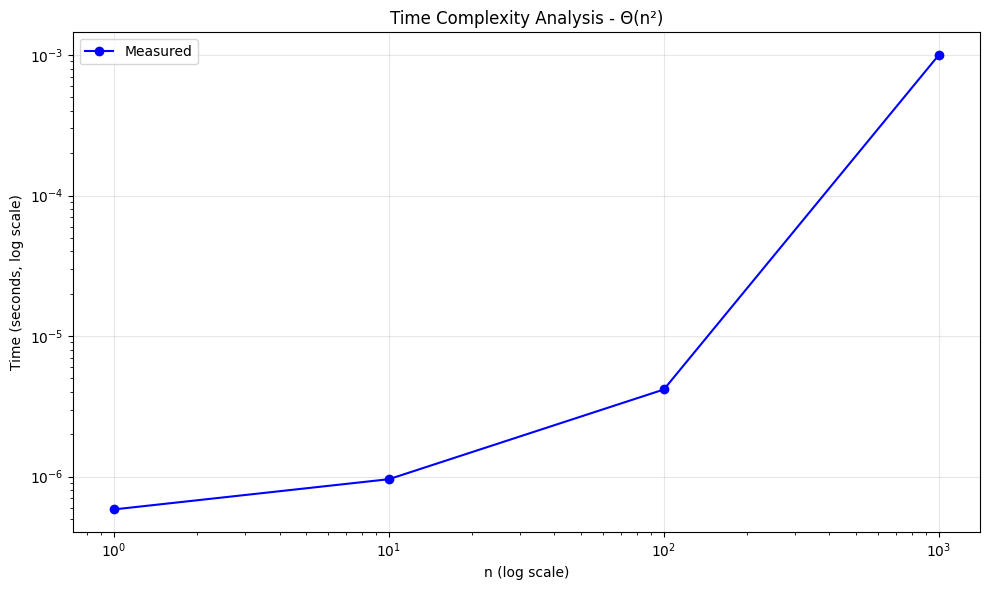

In [10]:
iteration_workflow()